In [8]:
from io import StringIO
import pandas as pd
df = pd.read_csv("./wavefront_runtimes.csv")
wavefront_runtimes = df.to_dict(orient='records')
print(wavefront_runtimes)

[{'Version': 'sequential', 'Size': 2048, 'Processes': 1, 'Runtime': 1384}, {'Version': 'sequential', 'Size': 2896, 'Processes': 1, 'Runtime': 4897}, {'Version': 'sequential', 'Size': 4096, 'Processes': 1, 'Runtime': 13914}, {'Version': 'sequential', 'Size': 5793, 'Processes': 1, 'Runtime': 39617}, {'Version': 'sequential', 'Size': 8192, 'Processes': 1, 'Runtime': 108699}, {'Version': 'mpi', 'Size': 2048, 'Processes': 1, 'Runtime': 2018}, {'Version': 'mpi', 'Size': 2048, 'Processes': 2, 'Runtime': 1146}, {'Version': 'mpi', 'Size': 2048, 'Processes': 4, 'Runtime': 617}, {'Version': 'mpi', 'Size': 2048, 'Processes': 8, 'Runtime': 397}, {'Version': 'mpi', 'Size': 2048, 'Processes': 16, 'Runtime': 218}, {'Version': 'mpi', 'Size': 2896, 'Processes': 1, 'Runtime': 5995}, {'Version': 'mpi', 'Size': 2896, 'Processes': 2, 'Runtime': 3300}, {'Version': 'mpi', 'Size': 2896, 'Processes': 4, 'Runtime': 1984}, {'Version': 'mpi', 'Size': 2896, 'Processes': 8, 'Runtime': 1647}, {'Version': 'mpi', 'Size

In [9]:
size = [2048, 2896, 4096, 5793, 8192]
processes = [1, 2, 4, 8, 16]

class CSVKeys:
     version = 'Version'
     size = 'Size'
     processes = 'Processes'
     runtime ='Runtime'

class DATAKeys:
        processors = 'processors'
        runtime_ff ='runtime_ff'
        runtime_mpi = 'runtime_mpi'
        T_seq = 'T_seq'
        path = 'path'
        size = 'size'

class Version:
     seq = 'sequential'
     mpi = 'mpi'
     ff = 'fastflow'

In [10]:
strong_scalability_data = []

for s in size:
    wavefront_runtimes_per_size = [runtime for runtime in wavefront_runtimes if runtime[CSVKeys.size] == s]
    mpi_runtime = [runtime[CSVKeys.runtime] for runtime in wavefront_runtimes_per_size if runtime[CSVKeys.version] == Version.mpi]
    ff_runtime = [runtime[CSVKeys.runtime] for runtime in wavefront_runtimes_per_size if runtime[CSVKeys.version] == Version.ff]
    seq_runtime = [runtime[CSVKeys.runtime] for runtime in wavefront_runtimes_per_size if runtime[CSVKeys.version] == Version.seq]

    strong_scalability_data.append({
        DATAKeys.processors: processes,
        DATAKeys.runtime_ff: ff_runtime,
        DATAKeys.runtime_mpi: mpi_runtime,
        DATAKeys.T_seq: seq_runtime[0],
        DATAKeys.path: f'./strong_scalability_plots/{s}/',
        DATAKeys.size: [s] * len(ff_runtime),
    })

In [11]:
mpi_runtimes = []
ff_runtimes = []
seq_runtimes = []

for s, p in zip(size, processes):
    runtimes = [runtime for runtime in wavefront_runtimes if runtime[CSVKeys.size] == s and runtime[CSVKeys.processes] == p]
    mpi_runtime = [runtime[CSVKeys.runtime] for runtime in runtimes if runtime[CSVKeys.version] == Version.mpi][0]
    ff_runtime = [runtime[CSVKeys.runtime] for runtime in runtimes if runtime[CSVKeys.version] == Version.ff][0]
    seq_runtime = [runtime[CSVKeys.runtime] for runtime in wavefront_runtimes if runtime[CSVKeys.size] == s and runtime[CSVKeys.version] == Version.seq][0]

    mpi_runtimes.append(mpi_runtime)
    ff_runtimes.append(ff_runtime)
    seq_runtimes.append(seq_runtime)

weak_scalability_data = {
    DATAKeys.processors: processes,
    DATAKeys.runtime_ff: ff_runtimes,
    DATAKeys.runtime_mpi: mpi_runtimes,
    DATAKeys.T_seq: seq_runtimes,
    DATAKeys.path: f'./weak_scalability_plots/',
    DATAKeys.size: size,

} 
print(weak_scalability_data)

{'processors': [1, 2, 4, 8, 16], 'runtime_ff': [1486, 3271, 5520, 11003, 23385], 'runtime_mpi': [2018, 3300, 5624, 13745, 20190], 'T_seq': [1384, 4897, 13914, 39617, 108699], 'path': './weak_scalability_plots/', 'size': [2048, 2896, 4096, 5793, 8192]}


In [12]:
import matplotlib.pyplot as plt
import numpy as np

def plot_analysis(
    processors,
    runtime,
    cost,
    speedup,
    efficiency,
    title,
    runtime2,
    cost2,
    speedup2,
    efficiency2,
    title2,
    filename
):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    def add_table(ax, values1, values2, label1, label2):
        cell_text = [values1, values2]
        row_labels = [label1, label2]
        table = ax.table(cellText=cell_text,
                        rowLabels=row_labels,
                        cellLoc='center',
                        rowLoc='center',
                        loc='bottom',
                        bbox=[0, -0.4, 1, 0.2])
        table.scale(1, 1.2)

    axs[0, 0].plot(processors, runtime, color='orange', label=f'Runtime {title}')
    axs[0, 0].plot(processors, runtime2, color='blue', label=f'Runtime {title2}', linestyle='--')
    axs[0, 0].set_title(f'Runtime (ms)')
    axs[0, 0].set_xlabel('Processors (p)')
    axs[0, 0].set_ylabel('Runtime (ms)')
    axs[0, 0].grid(True)
    axs[0, 0].legend()
    add_table(axs[0, 0], runtime, runtime2, f'Runtime {title} (ms)', f'Runtime {title2} (ms)')

    axs[0, 1].plot(processors, cost, color='orange', label=f'Cost {title}')
    axs[0, 1].plot(processors, cost2, color='blue', label=f'Cost {title2}', linestyle='--')
    axs[0, 1].set_title(f'Cost')
    axs[0, 1].set_xlabel('Processors (p)')
    axs[0, 1].set_ylabel('Cost')
    axs[0, 1].grid(True)
    axs[0, 1].legend()
    add_table(axs[0, 1], cost, cost2, f'Cost {title}', f'Cost {title2}')

    axs[1, 0].plot(processors, speedup, color='orange', label=f'Speedup {title}')
    axs[1, 0].plot(processors, speedup2, color='blue', label=f'Speedup {title2}', linestyle='--')
    axs[1, 0].set_title(f'Speedup')
    axs[1, 0].set_xlabel('Processors (p)')
    axs[1, 0].set_ylabel('Speedup')
    axs[1, 0].grid(True)
    axs[1, 0].legend()
    add_table(axs[1, 0], speedup, speedup2, f'Speedup {title}', f'Speedup {title2}')

    axs[1, 1].bar(processors, efficiency, color='orange', label=f'Efficiency {title}', width=0.4, align='center')
    axs[1, 1].bar(np.array(processors) + 0.4, efficiency2, color='blue', label=f'Efficiency {title2}', width=0.4, align='center')
    axs[1, 1].set_title('Efficiency (in %)')
    axs[1, 1].set_xlabel('Processors (p)')
    axs[1, 1].set_ylabel('Efficiency (%)')
    axs[1, 1].grid(True)
    axs[1, 1].legend()
    add_table(axs[1, 1], efficiency, efficiency2, f'Efficiency {title}', f'Efficiency {title2}')

    plt.tight_layout()

    plt.savefig(filename, bbox_inches='tight')
    plt.show()
    plt.close()


### Strong scalability Plots

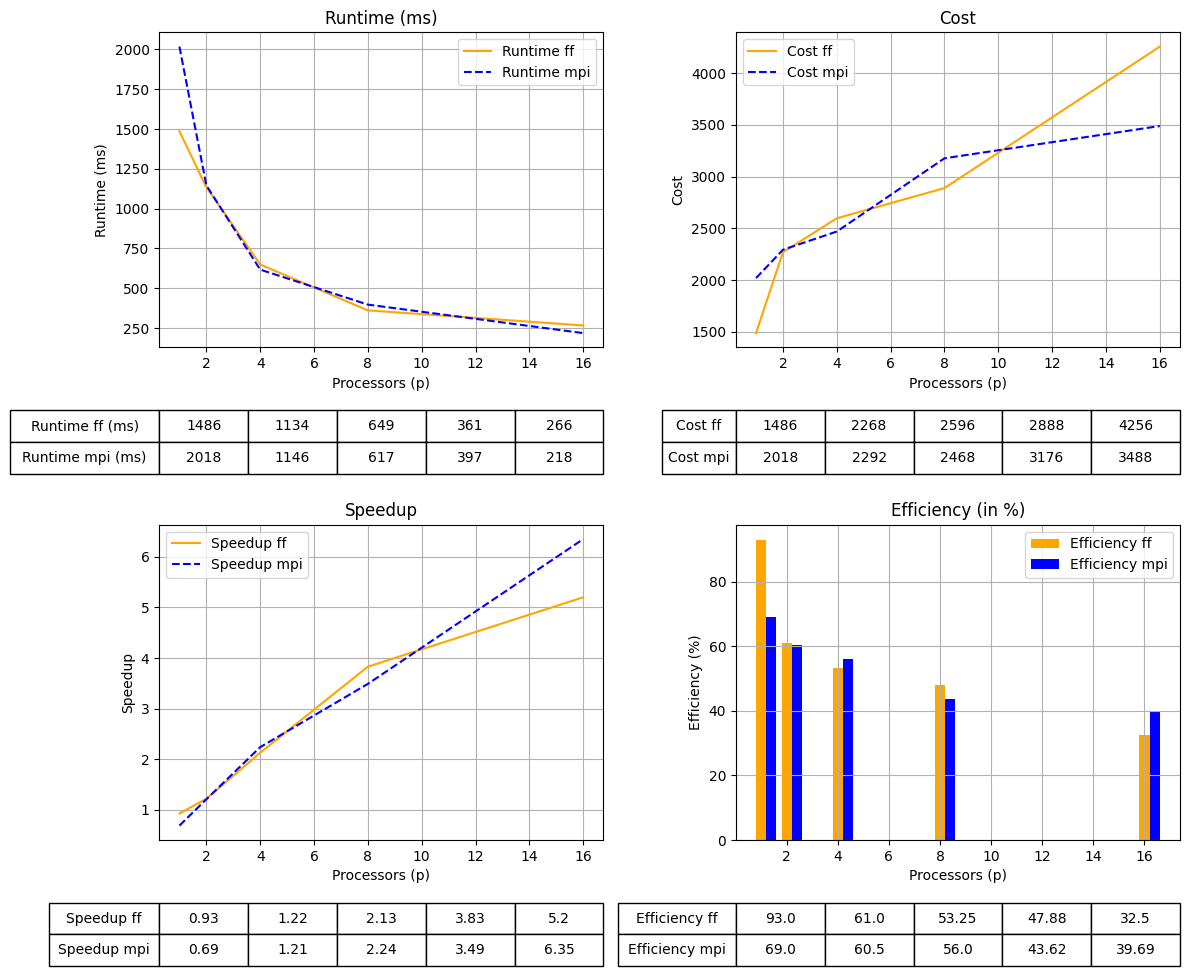

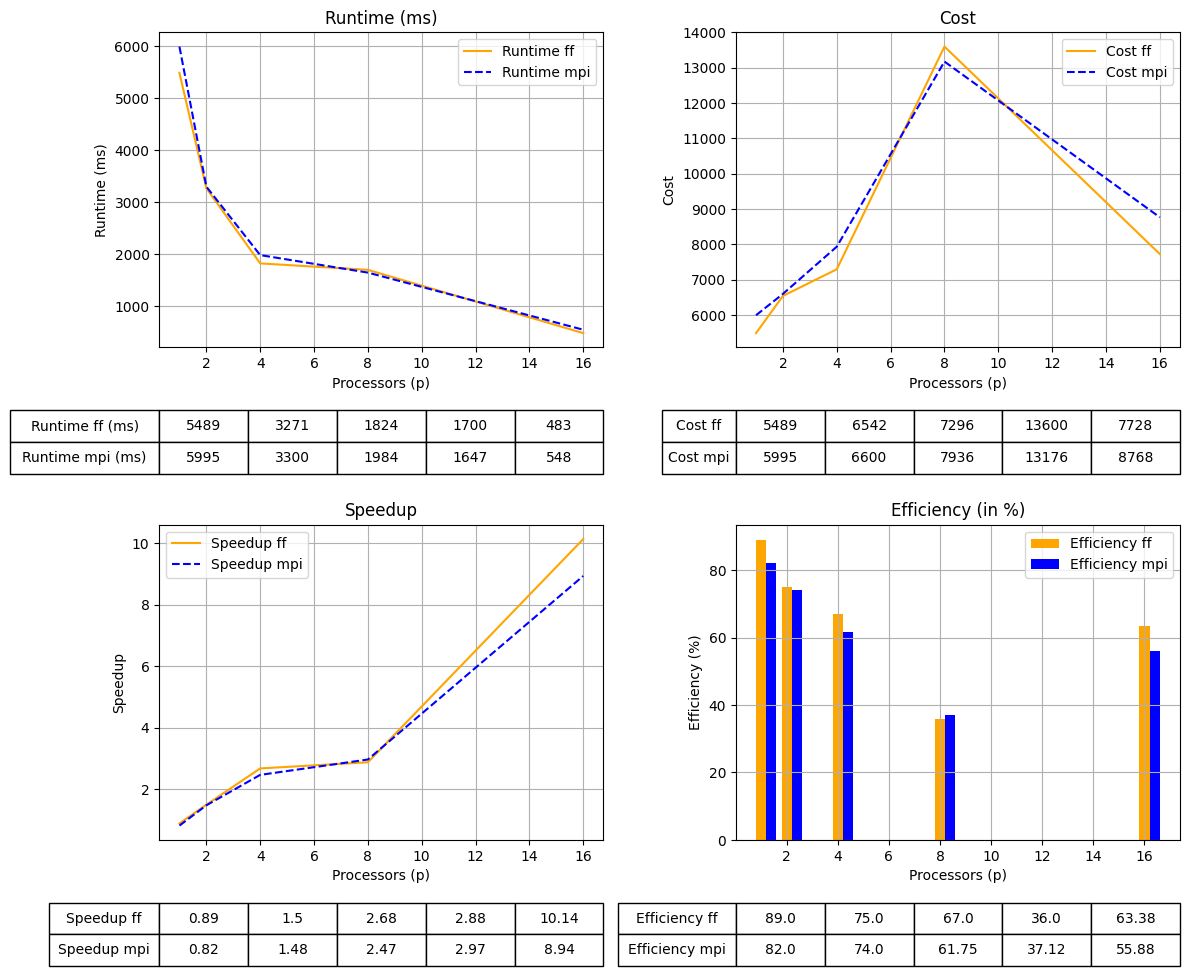

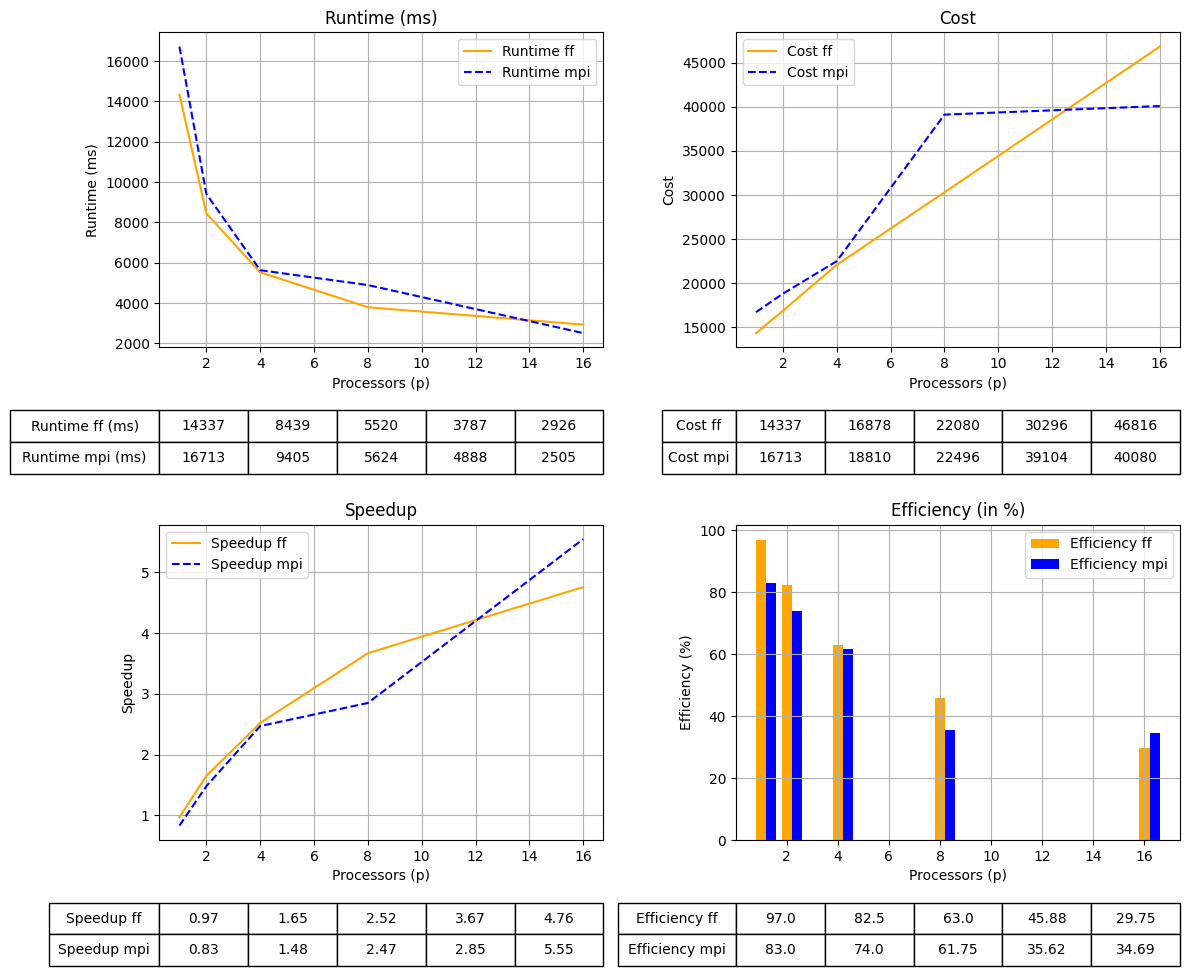

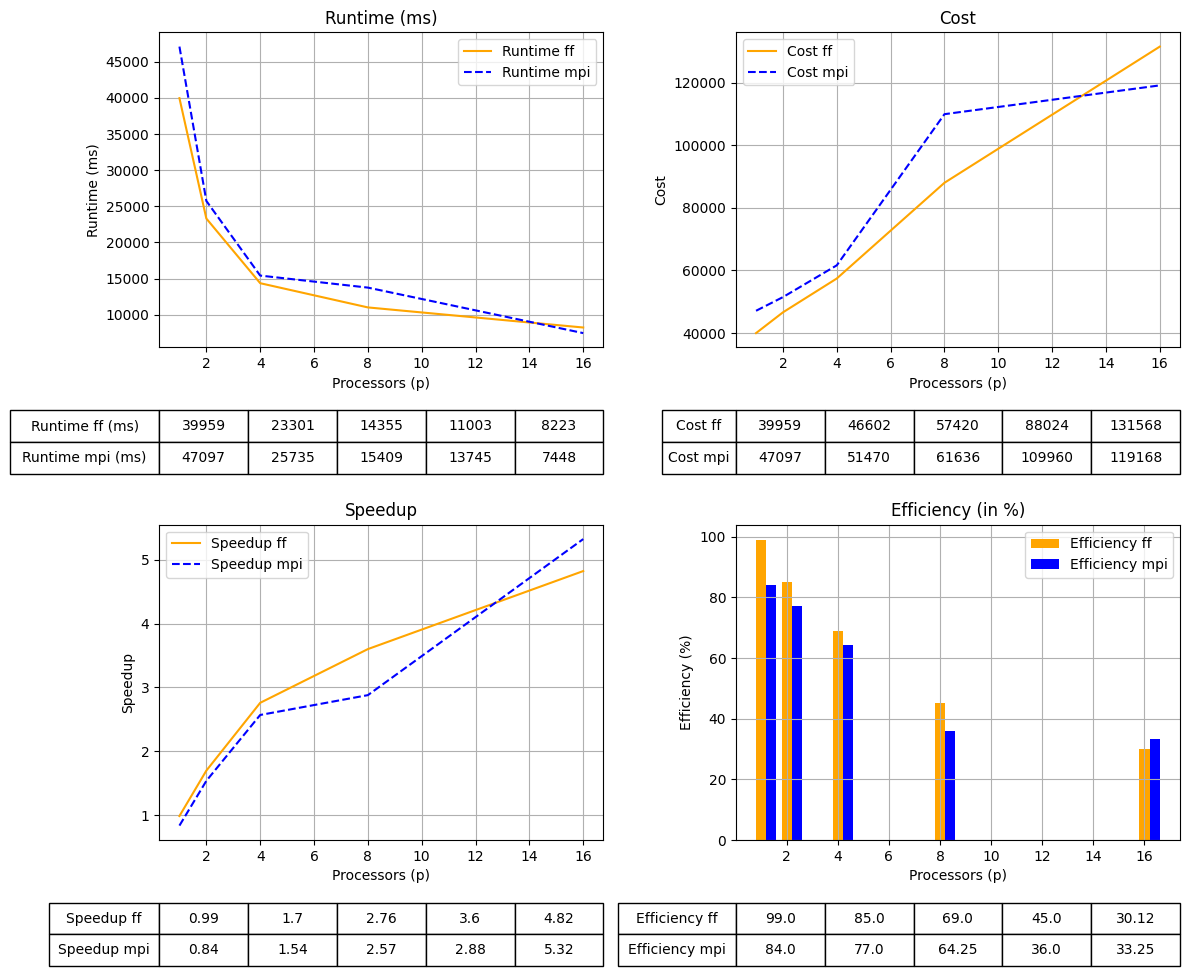

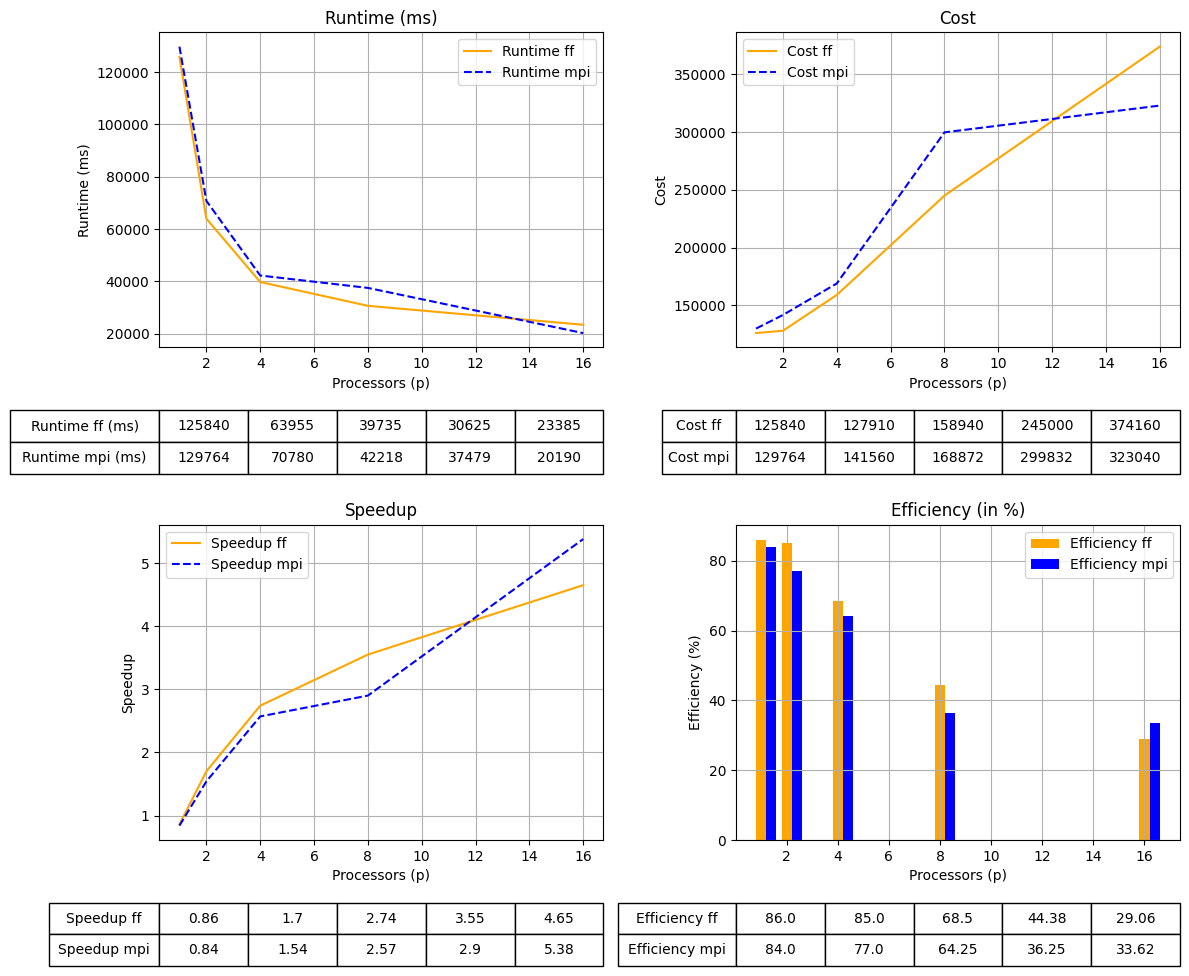

In [13]:
for strong_scalability in strong_scalability_data:

    processors = strong_scalability[DATAKeys.processors]
    runtime_ff = strong_scalability[DATAKeys.runtime_ff]
    runtime_mpi = strong_scalability[DATAKeys.runtime_mpi]
    T_seq = strong_scalability[DATAKeys.T_seq]
    m_size = strong_scalability[DATAKeys.size]

    speedup_ff = []
    speedup_mpi = []
    if isinstance(T_seq, list):
        speedup_ff = [round(t / r, 2) for t, r in zip(T_seq, runtime_ff)]
        speedup_mpi = [round(t / r, 2) for t, r in zip(T_seq, runtime_mpi)]
    else:
        speedup_ff = [round(T_seq / r, 2) for r in runtime_ff]
        speedup_mpi = [round(T_seq / r, 2) for r in runtime_mpi]


    cost_ff = [r * p for r, p in zip(runtime_ff, processors)]
    cost_mpi = [r * p for r, p in zip(runtime_mpi, processors)]


    efficiency_ff = [round(100 * s / p, 2) for s, p in zip(speedup_ff, processors)]
    efficiency_mpi = [round(100 * s / p, 2) for s, p in zip(speedup_mpi, processors)]

    plot_analysis(
        processors,
        runtime_ff,
        cost_ff,
        speedup_ff,
        efficiency_ff,
        'ff',
        runtime_mpi,
        cost_mpi,
        speedup_mpi,
        efficiency_mpi,
        'mpi',
        f'{strong_scalability[DATAKeys.path]}/analysis'
    ) 



### Weak Scalability Plots

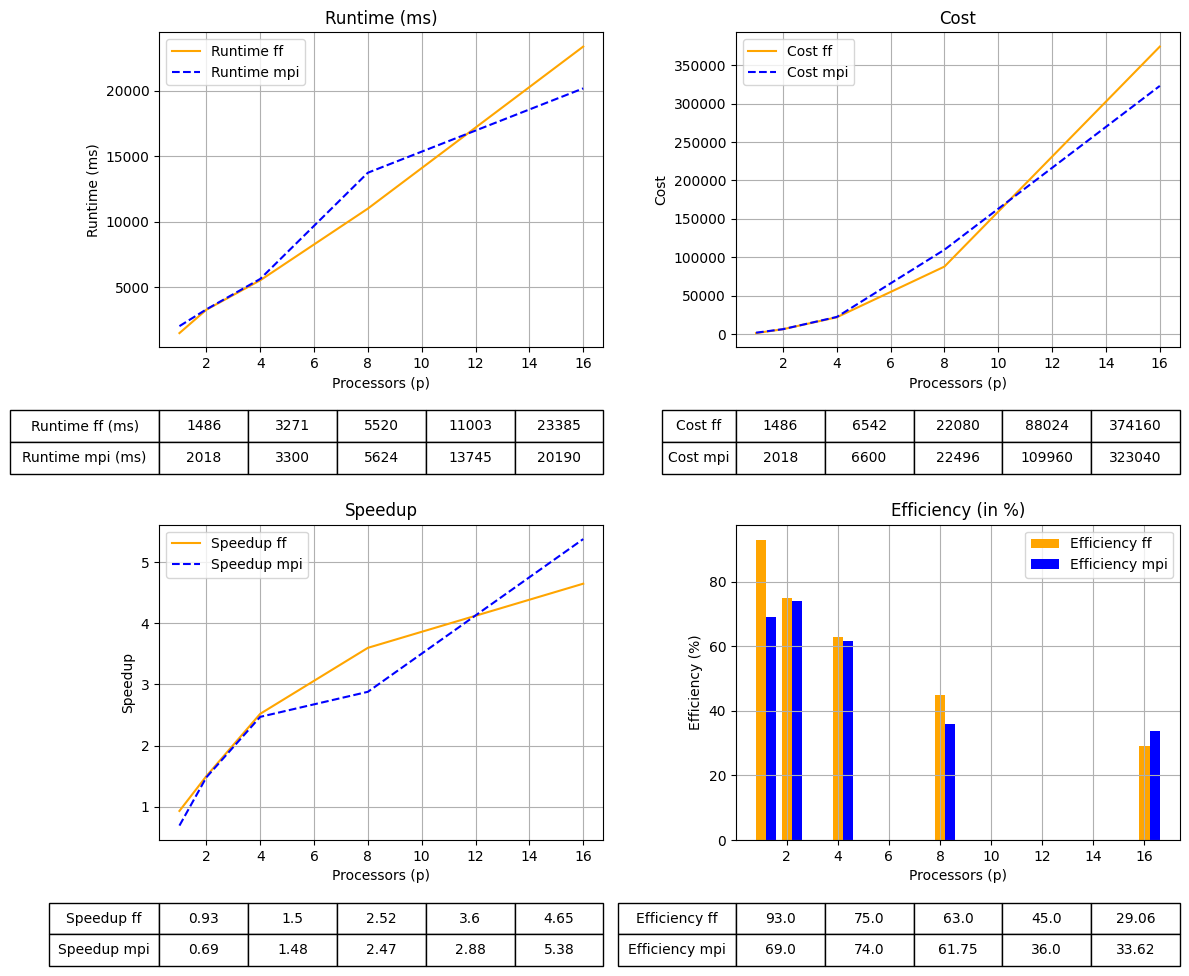

In [14]:
processors = weak_scalability_data[DATAKeys.processors]
runtime_ff = weak_scalability_data[DATAKeys.runtime_ff]
runtime_mpi = weak_scalability_data[DATAKeys.runtime_mpi]
T_seq = weak_scalability_data[DATAKeys.T_seq]
m_size = weak_scalability_data[DATAKeys.size]


speedup_ff = []
speedup_mpi = []
if isinstance(T_seq, list):
    speedup_ff = [round(t / r, 2) for t, r in zip(T_seq, runtime_ff)]
    speedup_mpi = [round(t / r, 2) for t, r in zip(T_seq, runtime_mpi)]
else:
    speedup_ff = [round(T_seq / r, 2) for r in runtime_ff]
    speedup_mpi = [round(T_seq / r, 2) for r in runtime_mpi]


cost_ff = [r * p for r, p in zip(runtime_ff, processors)]
cost_mpi = [r * p for r, p in zip(runtime_mpi, processors)]


efficiency_ff = [round(100 * s / p, 2) for s, p in zip(speedup_ff, processors)]
efficiency_mpi = [round(100 * s / p, 2) for s, p in zip(speedup_mpi, processors)]

plot_analysis(
    processors,
    runtime_ff,
    cost_ff,
    speedup_ff,
    efficiency_ff,
    'ff',
    runtime_mpi,
    cost_mpi,
    speedup_mpi,
    efficiency_mpi,
    'mpi',
    f'{weak_scalability_data[DATAKeys.path]}/analysis'
)